# Import PDF Document

In [1]:
import os
import requests

# Get PDF document path
pdf_path = "human-nutrition-text.pdf"

# Download PDF
if not os.path.exists(pdf_path):
    print(f"[INFO] File Doesn't exist, downloading,")

    # Enter URL for pdf
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    # The local filename to save the downloaded file
    file_name = pdf_path

    # Send get request

    response = requests.get(url)

    # Check if the request is successfull
    if response.status_code == 200:
        # open the file and save it
        with open(file_name,"wb") as file:
            file.write(response.content)
        print(f"[INFO] The file has been downloaded and save as {file_name}")
    else:
        print(f"[INFO] We have faild to download the file {response.status_code}")
else:
    print(f"File {pdf_path} exists.")

File human-nutrition-text.pdf exists.


In [2]:
import fitz
from tqdm.auto import tqdm

we got pdf PDF lets open it using
(PyMuPDF,pypdf)
PyMuPDF==1.23.26

In [3]:
import fitz
from tqdm.auto import tqdm # pip install tqdm
def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n"," ").strip()

    # Potentially more text formatting functions can go here

    return cleaned_text

def open_and_read_pdf(pdf_path:str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)): # page_numeber-0 to n 
        text = page.get_text()
        text = text_formatter(text)
        pages_and_texts.append({"page_number" : page_number - 41,
                                "page_char_count":len(text),
                                "page_word_count":len(text.split(" ")),
                                "page_sentence_count_raw":len(text.split(". ")),
                                "page_token_count":len(text) / 4, # 1 token = ~4 characters
                                "text" :text})
    return pages_and_texts
pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [4]:
import random
random.sample(pages_and_texts,k=3)

[{'page_number': 997,
  'page_char_count': 1631,
  'page_word_count': 284,
  'page_sentence_count_raw': 13,
  'page_token_count': 407.75,
  'text': 'The Causes of Food  Contamination  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Both food infections and food intoxications can create a burden on  health systems, when patients require treatment and support, and  on food systems, when companies must recall contaminated food  or address public concerns. It all begins with the agent that causes  the contamination. When a person ingests a food contaminant, it  travels to the stomach and intestines. There, it can interfere with  the body’s functions and make you sick. In the next part, we will  focus on different types of food contaminants and examine common  microbes, toxins, chemicals, and other substances that can cause  food infections and intoxications. Let’s begin with pathogens, which  include bacteria and viruses. About one hund

In [5]:
import pandas as pd
df=pd.DataFrame(pages_and_texts)
df

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...
...,...,...,...,...,...,...
1203,1162,1676,252,18,419.00,39. Exercise 10.2 & 11.3 reused “Egg Oval Food...
1204,1163,1617,254,10,404.25,Images / Pixabay License; “Pumpkin Cartoon Ora...
1205,1164,1715,261,13,428.75,Flashcard Images Note: Most images in the fla...
1206,1165,1733,268,13,433.25,ShareAlike 11. Organs reused “Pancreas Organ ...


In [6]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00
std,348.86,560.38,95.76,6.19,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,4.00,190.50
50%,562.50,1231.50,214.50,10.00,307.88
75%,864.25,1603.50,271.00,14.00,400.88
max,1166.00,2308.00,429.00,32.00,577.00


Why would we care about token count ?

Token count is important to think about because:
1. Embedding models don't deal with infinite tokens.
2. LLMs don't deal with infinite tokens.

For example an embedding model may have been trained to embed sequences of 384 tokens into numerical space (sentence-transformers all-mpnet-base-v2, see: https://sbert.net/docs/sentence_transformer/pretrained_models.html).

As for LLMs, they can't accept infinits tokens in their context window

### Further text processing (splitting pages into sentences)

Two ways to do this
1. We've done this by splitting on `". "`.
2. We can do this with a NLP library such as spacy and nltk.

In [7]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline, see
nlp.add_pipe("sentencizer")

# Create document instance as an example

doc = nlp("This is a sentence. This another sentence. I like elephants.")

assert len(list(doc.sents)) == 3

# print our sentence split
list(doc.sents)

[This is a sentence., This another sentence., I like elephants.]

In [8]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
# Make sure all sentence are string ( the default type is spaCy datatype)
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

# count the sentence 
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [9]:
random.sample(pages_and_texts,k=1)

[{'page_number': 942,
  'page_char_count': 1071,
  'page_word_count': 160,
  'page_sentence_count_raw': 6,
  'page_token_count': 267.75,
  'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Physical Activity Recommendations  The CDC along with the American College of Sports Medicine  (ACSM) have evidence based \xa0recommendations and guidelines for  individuals to follow in order to obtain or maintain a healthy  lifestyle. Adults should get at least 150 minutes of moderate- intensity aerobic physical activity or 75 minutes of vigorous- intensity aerobic physical activity each week. In addition to aerobic  physical activity, it is recommended that adults do muscle  strengthening activities on each major muscle group two or three  times each week. Adults also are recommended by the ACSM to do  flexibility exercises at least two to three times a week to improve  range of motion. To learn more about these guidelines visit the CDC  website at https://health.gov/paguidelines/guidelines/adul

In [10]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


### Chunking our sentence together 

The concept of splitting larger pices of text into smaller ones is often referred to as text splitting or chunking.

There is no 100% correct way to do this.

we'll keep it simple and split into groups of 10 sentences (however, you could also try 5, 7 ,8, whatever you like)

Why we do this:
1. So our texts are easier to filter (smaller groups of text can be easier to inspect that large passages of text).
2. So our texts chunks can fit into our embeddings model context window (e.g. 384 tokens as a limit)
3. So our contexts passed to the LLM can be more specefic and focused.

In [11]:
# Define split size to turn groups of sentences into chunks 
nums_sentence_chunk_size = 10

# Create a function to split the list of text recursivly into chunk size

# e.g. list of 20 -> [10,10] or 25 -> [10,10,5]
def split_list(input_list:list,
               slice_size:int = nums_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+ slice_size] for i in range (0, len(input_list),slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [12]:
# loop through pages and text and split into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"]=split_list(input_list=item["sentences"],
                                      slice_size=nums_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [13]:
random.sample(pages_and_texts,k=1)

[{'page_number': 460,
  'page_char_count': 1958,
  'page_word_count': 337,
  'page_sentence_count_raw': 19,
  'page_token_count': 489.5,
  'text': 'The Atom  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Cells are the basic building blocks of life, but atoms are the basic  building blocks of all matter, living and nonliving. The structural  elements of an atom are protons (positively charged), neutrons (no  charge), and electrons (negatively charged). Protons and neutrons  are contained in the dense nucleus of the atom; the nucleus thus has  a positive charge. Because opposites attract, electrons are attracted  to this nucleus and move around it in the electron cloud.  Electrons contain energy, and this energy is stored within the  charge and movement of electrons and the bonds atoms make with  one another. However, this energy is not always stable, depending  on the number of electrons within an atom. Atoms are more stable  when 

In [14]:
item

{'page_number': 1166,
 'page_char_count': 257,
 'page_word_count': 44,
 'page_sentence_count_raw': 3,
 'page_token_count': 64.25,
 'text': '23. Vitamin D reused “The Functions of Vitamin D” by Allison  Calabrese / Attribution – Sharealike  24. Vitamin K reused “Kale Lacinato Lacinato Kale” by BlackRiv\xa0/  Pixabay License; “Phylloquinone structure” by Mysid\xa0/ Public  Domain  1166  |  Attributions',
 'sentences': ['23.',
  'Vitamin D reused “The Functions of Vitamin D” by Allison  Calabrese / Attribution – Sharealike  24.',
  'Vitamin K reused “Kale Lacinato Lacinato Kale” by BlackRiv\xa0/  Pixabay License; “Phylloquinone structure” by Mysid\xa0/ Public  Domain  1166  |  Attributions'],
 'page_sentence_count_spacy': 3,
 'sentence_chunks': [['23.',
   'Vitamin D reused “The Functions of Vitamin D” by Allison  Calabrese / Attribution – Sharealike  24.',
   'Vitamin K reused “Kale Lacinato Lacinato Kale” by BlackRiv\xa0/  Pixabay License; “Phylloquinone structure” by Mysid\xa0/ Public 

In [15]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


### Splitting each chunk into its own item

we'd like to embed each chunk of sentences into its own numerical representation.

That'll give  you a good level of granularity .

Meaning, we can dive specefically into the text sample that we used in our model.

In [16]:
# import re

# # Splitting each chunk into its own item 

# pages_and_chunks = []
# for item in tqdm(pages_and_texts):
#     for sentance_chunk in item["sentence_chunks"]:
#         chunk_dict={}
#         chunk_dict["page_number"]=item["page_number"]

#         # Join the sentence togather into paragraph like structure, aka join the list of sentences into one paragraph
#         joined_sentence_chunk = "".join(sentance_chunk).replace("  "," ").strip()
#         joined_sentence_chunk = re.sub(r'\.([A-Z])',r'. \1', joined_sentence_chunk) # ".A" -> ". A" ( will work for any capital letter)
        

#         # Get some state on our chunk
#         chunk_dict["sentence_chunk"] = joined_sentence_chunk

#         chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)

#         chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])

#         chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4 # 1 token = ~4 char

#         pages_and_chunks.append(chunk_dict)

# len(pages_and_chunks)
    

In [17]:
import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts): 
    for sentence_chunk in item["sentence_chunks"]: 
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Join the sentences together into a paragraph-like structure, aka join the list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" => ". A" (will work for any captial letter)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get some stats on our chunks
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 chars

        pages_and_chunks.append(chunk_dict) 

len(pages_and_chunks)


  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [18]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 506,
  'sentence_chunk': 'http://www.health.gov/paguidelines/guidelines/ chapter2.aspx. Published 2008. Accessed September 22, 2017. 8.\xa0Source: 2008 Physical Activity Guidelines for Americans. US Department of Health and Human Services. http://www.health.gov/paguidelines/guidelines/ 506 | Dietary, Behavioral, and Physical Activity Recommendations for Weight Management',
  'chunk_char_count': 344,
  'chunk_word_count': 34,
  'chunk_token_count': 86.0}]

In [19]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


### Filter chunks of text for short chunks

These chunk may not contain much useful information



In [20]:
# show random chunks with under 30 token length
min_token_length = 30
for row in df[df["chunk_char_count"]<= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 3.75 | Text: 806 | Pregnancy
Chunk token count: 3.25 | Text: 622 | Calcium
Chunk token count: 5.25 | Text: 754 | MyPlate Planner
Chunk token count: 4.25 | Text: Introduction | 61
Chunk token count: 3.25 | Text: 814 | Infancy


In [21]:
# Filter our DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

### Embedding our texts chunks

Embeddings are a broud but powerful concept,

while humen understan text, machines understand numbers.

What we'do like to do:
- Turn our text chunks into numbers, specefically embeddings.

A useful numerical representation

The best part about embeddings is that are a *learned* representation.


```

{"the":0,
"a",1,
...
```
For great resource on learning embeddings, see here: https://vickiboykis.com/what_are_embeddings/




#### pip install -U sentence-transformers
#### !pip install tf-keras
WARNING:tensorflow:From E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.


In [22]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2")

In [23]:
# Create a list of sentences

sentences = ["The Sentence Transfomer library provides an easy way to create embeddings",
             "Sentences can be embedded one by one or in a list so multiple at a time",
             "I like horses!"]
# Sentences are encoded / embedded by calling model.encode()

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences,embeddings))


# See the embeddings
# for sentence, embedding in embeddings_dict.items():
#     print(f"Sentence: {sentences}")
#     print(f"Embedding: {embedding}")
#     print("")

In [24]:
embeddings[0].shape

(768,)

In [25]:
embeddings.ndim

2

In [26]:
embedding = embedding_model.encode("My Favourite animal is the cow!")
# embedding
len(embedding)

768

In [27]:
# %%time

# embedding_model.to("cpu")

# # Embed each chunk one by one

# for item in tqdm(pages_and_chunks_over_min_token_len):
#     item["embedding"] = embedding_model.encode(item["sentence_chunk"])

# 100%
#  1680/1680 [05:28<00:00,  4.31it/s]
# CPU times: total: 21min 15s
# Wall time: 5min 28s

In [28]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

CPU times: total: 4min 4s
Wall time: 1min 39s


In [29]:
%%time 

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: total: 0 ns
Wall time: 0 ns


'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [30]:
len(text_chunks)

1680

In [31]:
%%time

# Embed all chunks into batches

text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, # you can experiment to find which batch size leads to best result
                                               convert_to_tensor=True)
text_chunk_embeddings

CPU times: total: 1min 19s
Wall time: 55.2 s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [32]:
# pages_and_chunks_over_min_token_len[419]

In [33]:
### Save embeddings to file 
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path =  "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path,index=False)

In [34]:
# Import save file and view
text_chunk_and_embedding_df_load = pd.read_csv("text_chunks_and_embeddings_df.csv")

In [35]:
text_chunk_and_embedding_df_load.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1680.00,1680.00,1680.00,1680.00
mean,580.64,798.98,122.28,199.74
std,349.77,415.36,66.65,103.84
min,-39.00,121.00,9.00,30.25
25%,277.00,420.75,62.00,105.19
50%,579.50,817.50,125.00,204.38
75%,889.25,1143.25,177.00,285.81
max,1166.00,1831.00,297.00,457.75


In [36]:
text_chunk_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242601e-02 9.02281329e-02 -5.09549817e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156195e-02 5.92139363e-02 -1.66167337e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801637e-02 3.39813977e-02 -2.06426624e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566836e-02 3.81274931e-02 -8.46855342e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264419e-02 -8.49762000e-03 9.57159325e-...


## RAG - Search and Answer

RAG goal: Retrive relevant passages based on query and use those passages to augment an input to an LLM so it can generate an output based on relevant passages


### Similarity Search

Embeddings can be used on almost any type of data

For example, you can turn images into embeddings, sound into embeddings, text into embeddings etc...

Comparing embeddings is known as similarity search, vector search, semantic search.

In our case, we want to query nutrition textbook passages based on semantic or *vibe*,

So if I search for "macronutrients functions" I should get relavent passage to that text but may not contain exactly the words "macronutrient functions.

Whereas with keyword search, IF i search "apple" I get passage with specefically "apple".

In [37]:
import random

import torch
import numpy as np
import pandas as pd
device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embeddings df

text_chunks_and_embedding_df = pd.read_csv('text_chunks_and_embeddings_df.csv')

# Convert embedding column back to np.array (it get converted to string when it saved to CSV)
"""
if code not work try this
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"),sep=" "))

"""
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"),sep=" "))

# text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x))
embeddings = np.stack(text_chunks_and_embedding_df["embedding"].tolist(),axis=0)

# Convert our embeddings into torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(),axis=0),dtype=torch.float32).to(device)


# Convert text and embedding df to list of dict

pages_of_chunk = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242601, 0.0902281329, -0.00509549817, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156195, 0.0592139363, -0.0166167337, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801637, 0.0339813977, -0.0206426624, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566836, 0.0381274931, -0.00846855342, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264419, -0.00849762, 0.00957159325, -0...."
...,...,...,...,...,...,...
1675,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25,"[0.0185622554, -0.0164278168, -0.0127045466, -..."
1676,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75,"[0.0334720723, -0.0570440441, 0.0151489424, -0..."
1677,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50,"[0.0770515278, 0.00978554226, -0.0121817542, 0..."
1678,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50,"[0.103045151, -0.0164702311, 0.00826845877, 0...."


In [38]:
embeddings.shape

torch.Size([1680, 768])

In [39]:
"""
If not work try this
embeddings = np.array(text_chunks_and_embedding_df["embedding"].tolist())
embeddings
"""
# embeddings = np.stack(text_chunks_and_embedding_df["embedding"].tolist(),axis=0)
# embeddings


'\nIf not work try this\nembeddings = np.array(text_chunks_and_embedding_df["embedding"].tolist())\nembeddings\n'

In [40]:
type(embeddings)

torch.Tensor

In [41]:
embeddings.shape

torch.Size([1680, 768])

In [42]:
# create model
from sentence_transformers import util,SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",device=device)

In [43]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

Embedding model is ready!

Let's create a small semantic pipeline

In essence, we want to search for query (e.g. "macronutrient functions") and get back relavent passages from our textbook.

We can do so with the following steps:

1. Define a query string
2. Turn the query into an embedding.
3. Perform a dot product or cosin similarity function between the text embedding and the query embeddings.
4. Sort the result from 3 descending Order.

In [44]:
embeddings

tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

Note: to use dot product for comparison, ensure vector sizes of same shape (e.g. 768) and tensor/vectors are in the same datatype (e.g. both are in torch float32)

In [45]:
# 1. Define the query 
query = "good foods for protein"
# query = "breastfeeding timeline for infants"
# query = "protein"
print(f"Query: {query}")

# 2. Embed the query 
# It's importent to embed your query with the same model you embedding your passages 
query_embedding = embedding_model.encode(query,convert_to_tensor=True).to("cuda")

# 3. Get Similarity score with dot product (Use cosion similarity if outputs of model aren't normalize)

from time import perf_counter as timer

start_timer = timer()
dot_scores = util.dot_score(a=query_embedding,b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get score on {len(embeddings)} embeddings. {end_time-start_timer:.5f} seconds.")

# 4. Get top-k results (we'll keep top 5)

top_results_dot_product = torch.topk(dot_scores , k = 5)
top_results_dot_product

Query: good foods for protein
[INFO] Time taken to get score on 1680 embeddings. 0.00136 seconds.


torch.return_types.topk(
values=tensor([0.7729, 0.7647, 0.6743, 0.6743, 0.6634], device='cuda:0'),
indices=tensor([611, 616, 615, 620, 617], device='cuda:0'))

In [46]:
# larger_embeddings = torch.randn(200*embeddings.shape[0], 768).to(device) # as  for my device it only take at most 220
# print(f"Embeddings Shape : {larger_embeddings.shape}")

# # Perform dot product across 168,000 embeddings

# start_timer = timer()
# dot_scores = util.dot_score(a=query_embedding,b=larger_embeddings)[0]
# end_time = timer()

# print(f"[INFO] Time taken to get score on {len(larger_embeddings)} embeddings. {end_time-start_timer:.5f} seconds.")


We can see that searching over embeddings is very fast.

But if you had 10M + embeddings, you likely want to create an index.

An index is like letter in the dictionary.

For example. if you wanted to search "duck" in the dictionary you'd start at "d" then find words close to "du.."etc.

An index helps to narrow it down.

A popular indexing library for vector search is Faiss(Facebook AI Similarity Search). https://ai.meta.com/tools/faiss/

One technique that the library provides is Approximate nearest neighbour search. https://en.wikipedia.org/wiki/Nearest_neighbor_search

Let's make our vector search result pretty.

In [47]:
import textwrap

def print_wrapped(text,wrap_length=80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrapped_text)

In [48]:
query="good foods for protein"
print(f"Query: '{query}'\n")
print("Result:")
# Loop through zipped togather score and indices from torch.topk
for score,idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_of_chunk[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]["page_number"]}")
    print("\n")

Query: 'good foods for protein'

Result:
Score: 0.7729
Text:
Dietary Sources of Protein The protein food group consists of foods made from
meat, seafood, poultry, eggs, soy, dry beans, peas, and seeds. According to the
Harvard School of Public Health, “animal protein and vegetable protein probably
have the same effects on health. It’s the protein package that’s likely to make
a difference.”1 1. Protein: The Bottom Line. Harvard School of Public Proteins,
Diet, and Personal Choices | 411
Page number: 380


Score: 0.7647
Text:
Additionally, a person should consume 8 ounces of cooked seafood every week
(typically as two 4-ounce servings) to assure they are getting the healthy
omega-3 fatty acids that have been linked to a lower risk for heart disease.
Another tip is choosing to eat dry beans, peas, or soy products as a main dish.
Some of the menu choices include chili with kidney and pinto beans, hummus on
pita bread, and black bean enchiladas. You could also enjoy nuts in a variety of
wa

Note: We could potentially improve the order of these results with a reranking model. A model that has been trained specifically to take search result 
(e.g. the top 25 semantic result) and rank them in order from most likely top-1 to least likely.

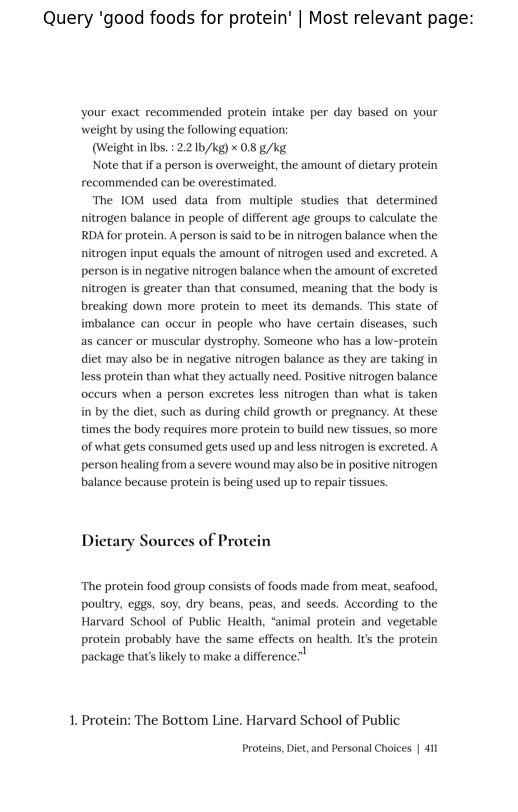

In [49]:
import fitz

# open pdf and load target
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(411+41)

# Get the image of page

img = page.get_pixmap(dpi=300)

# Save image (optional)
# img.save("output_filname.png")

doc.close()

img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h,img.w,img.n))

# Display the image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

#### Similarity Measured: dot product and cosine similarity

In [50]:
import torch

def dot_product(vector1,vector2):
    return torch.dot(vector1,vector2)
def cosion_similarity(vector1,vector2):
    dot_product = torch.dot(vector1,vector2)

    # Get Euclidean/L2norm

    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Example vector/tensor
vector1 = torch.tensor([1,2,3],dtype=torch.float32)
vector2 = torch.tensor([1,2,3],dtype=torch.float32)
vector3 = torch.tensor([4,5,6],dtype=torch.float32)
vector4 = torch.tensor([-1,-2,-3],dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1,vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1,vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1,vector4))

# Cosine similarity
print("Cosine similarity between vector1 and vector2:", cosion_similarity(vector1,vector2))
print("Cosine similarity between vector1 and vector3:", cosion_similarity(vector1,vector3))
print("Cosine similarity between vector1 and vector4:", cosion_similarity(vector1,vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [51]:
# embedding_model.encode("Yo Yo Yo")
# we are using dot product becase our vector are already normalized

### Functionizing our semantic search pipeline

Let's pull all of the steps from above for semantic search into function so we can repeat workflow

In [52]:
def retrieve_relevant_resources(query:str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time : bool = True):
    """
    Embeds a query with model and return top k scores and indices from embeddings
    """

    # Embed the query
    query_embedding = model.encode(query,convert_to_tensor=True)

    # Get dot product scores and embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get score on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores,indices = torch.topk(input=dot_scores,
                                k = n_resources_to_return)
    return scores, indices

def print_top_results_and_scores(query:str,
                                 embeddings:torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Finds relevant passages given a query and prints them out along with there scores.
    """

    scores,indices = retrieve_relevant_resources(query=query,
                                                 embeddings=embeddings,
                                                     n_resources_to_return=n_resources_to_return)
    for score,idx in zip(scores,indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_of_chunk[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]["page_number"]}")
        print("\n")

In [53]:
query = "foods high in fiber"
retrieve_relevant_resources(query=query,embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get score on 1680 embeddings: 0.00008 seconds.
[INFO] Time taken to get score on 1680 embeddings: 0.00007 seconds.
Score: 0.6964
Text:
• Change it up a bit and experience the taste and satisfaction of other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green
peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
Page number: 255


Score: 0.6810
Text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum and they are found in peas,
beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a
few dietary sources of them are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is the most abundant fiber in plants, making up the cell
walls and providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in the 

### Getting an LLM for local Generation

We want to focus on local generation.

However, this process is also work for LLM local api.

What is generative LLM?

Goes from text input -> generate text output

Which llm should i used?

* How much hardware VRAM do you have avaiable?

### Checking local gpu memory availability

In [54]:
# Get GPU available memory?
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Availabe GPU memory: {gpu_memory_gb} GB")

Availabe GPU memory: 4 GB


In [55]:
!nvidia-smi

Sat Feb 22 07:59:02 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   67C    P0               16W /  N/A|   2156MiB /  4096MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Note
* to use `gemma-7b-it` or other Gemma models, you have to accept terms & condition on hugging face 
* to download models and run locally from hugging face you may need to sing in to hugging face cli

In [56]:
from transformers.utils.quantization_config import BitsAndBytesConfig

# Initialize variables with default values
use_quantization_config = False
model_id = None

# Example GPU memory value (replace with actual value)
gpu_memory_gb = 6.0  # Replace this with the actual GPU memory in GB

# Define quantization config (example)
quantization_config = BitsAndBytesConfig(
    times_tensor="max",
    onnx_export=True,
    # Add other parameters as needed
)

# Determine the model and quantization settings based on GPU memory
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb >= 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

# Print the final settings
print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 6.0 | Recommended model: Gemma 2B in 4-bit precision.
use_quantization_config set to: True
model_id set to: google/gemma-2b-it


### Loding an LLM locally

We can load an llm locally using hugging-face transformers

The model I'm going to use on my NVIDIA RTX 4090 - https://huggingface.co/google/gemma-7b-it

To get a model running local we're going to need a few things:
1. A quantization config (optional) - a config on what precision to load the model in (e.g. 8bit, 4bit, etc)
2. A model ID - this will tell transformers which model/tokenizer to load
3. A tokenizer - this turns text into numbers ready for the LLM (note: a tokenizer is different from an embedding model)
4. An LLM model - this will be what we use to generate text based on an input!
> **Note:** There are many tips and tricks on loading/making LLMs work faster. One of the best ones is flash_attn (Flash Attention 2). See the GitHub for more: https://github.com/Dao-AILab/flash-attention

In [57]:
# !pip install git+https://github.com/huggingface/accelerate.git
# !pip install git+https://github.com/huggingface/transformers.git
# !pip install bitsandbytes
# !pip install vllm
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

No, **FlashAttention** is **not supported** on your **GTX 1650** because:  

### **Why FlashAttention Won't Work on GTX 1650**
1. ❌ **Requires Tensor Cores:** FlashAttention is optimized for **NVIDIA GPUs with Tensor Cores**, which are available in **Ampere (RTX 30-series)** and later architectures. The **GTX 1650 (Turing, TU117)** lacks Tensor Cores.  
2. ❌ **Needs CUDA >= 11.6 and SM >= 7.5:** FlashAttention requires **CUDA 11.6+** and GPUs with **Compute Capability 7.5+**. Your **GTX 1650 has Compute Capability 7.5** (some versions have 7.0), but **lacks required hardware acceleration**.  
3. ❌ **Low Memory Bandwidth:** FlashAttention is designed for GPUs with **high memory bandwidth** (e.g., RTX 30/40 series), while GTX 1650 has **lower bandwidth (~128 GB/s)**.  

### **Alternative Solutions for GTX 1650**
Since FlashAttention won't work, try:  
✅ **PagedAttention (vLLM)** – Efficient for low-VRAM GPUs  
✅ **BitsAndBytes (4-bit/8-bit quantization)** – Reduces memory usage  
✅ **CPU Offloading** – Moves attention layers to CPU (slower but works)  

Would you like help setting up **PagedAttention or quantization** for better performance? 🚀

In [58]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from transformers.utils import is_flash_attn_2_available

# 1. Create a quantization config
# Note: requires !pip install bitsandbytes accelerate
use_quantization_config = True  # Set this to False if you don't want to use quantization
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
) if use_quantization_config else None

# Bonus: flash attention 2 = faster attention mechanism
# Flash Attention 2 requires a GPU with a compute capability score of 8.0+ (Ampere, Ada Lovelace, Hopper and above): https://developer.nvidia.com/cuda-gpus 
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa"  # scaled dot product attention
print(f"Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use
model_id = "google/gemma-2b-it"

# 3. Instantiate tokenizer (tokenizer turns text into tokens)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
    low_cpu_mem_usage=True,  # Use meta device for loading
    attn_implementation=attn_implementation
)

# Move the model to the GPU and initialize weights
if not use_quantization_config:
    device = "cuda"
    llm_model.to_empty(device=device)  # Move to GPU and initialize weights
    llm_model.to(torch.float16)  # Ensure the model is in the correct dtype
else:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    llm_model.to(device)  # Quantized models are already initialized

print(f"Model loaded on device: {device}")

Using attention implementation: sdpa


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded on device: cuda


In [59]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear4bit(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (n

In [60]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])
get_model_num_params(llm_model)

1515268096

In [61]:
def get_model_mem_size(model: torch.nn.Module):
    # Get model parameters and buffer size
    mem_params = sum([param.nelement() *  param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() *  buf.element_size() for buf in model.buffers()])

    # Calculate model sizes
    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"model_mem_bytes":model_mem_bytes,
            "model_mem_mb" : model_mem_mb,
            "model_mem_gb" : model_mem_gb}

get_model_mem_size(llm_model)
    

{'model_mem_bytes': 2039632384,
 'model_mem_mb': 1945.14501953125,
 'model_mem_gb': 1.8995556831359863}

We got the size our model.

This means to load Gemma 7b-it in float16 we need a minimum of 16GB of VRAM, however due to the calculations that take place in the forward pass, we actually need closer to 19GB.

# Generating text with our LLM
Let's generate text with our local LLM!

**Note** : Some models have been trained/tuned to generate text with a specific template in mind.
Because `gemma-2b` has been trained in an instruction-tuned manner, we should follow the instruction template for the best results

In [62]:
input_text = "What are the macronutrients and what are their functions in the body?"
# input_text = "h?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients and what are their functions in the body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients and what are their functions in the body?<end_of_turn>
<start_of_turn>model



In [63]:
# tokenizer

In [64]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU

input_ids = tokenizer(prompt,
                      return_tensors="pt").to("cuda")
# input_ids

# Generate outputs from local LLM
outputs = llm_model.generate(**input_ids,
                             max_new_tokens = 512)

print(f"Model Output (tokens):\n {outputs[0]}\n") 

Model Output (tokens):
 tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592,    578,   1212,    708,   1024,   7257,    575,    573,   2971,
        235336,    107,    108,    106,   2516,    108,  21404, 235269,   1517,
        235303, 235256,    476,  25497,    576,    573, 186809, 184592,    578,
          1024,   7257,    575,    573,   2971, 235292,    109,    688,  12298,
          1695, 184592,  66058,    109, 235287,   5231, 156615,  56227,  66058,
         34428,   4134,    578,    708,    573,   2971, 235303, 235256,   7920,
          4303,    576,   9719, 235265,   2365,    708,   1942,    575,  16512,
          1154,  11843, 235269,  22512, 235269,  12463, 235269,    578,  16803,
        235265,    108, 235287,   5231,  49471,  66058,  47839,    604,   4547,
           578,  68808,  29703, 235269,   3547,  44760, 235269,    578,  17839,
         53186, 235265,   1165,    603,   1942,    575,  11827, 235269,   5001,
        235269, 

In [65]:
# Decode the output tokens to texts
output_decode = tokenizer.decode(outputs[0])
print(f"Model Output (decoded):\n{output_decode}\n")

Model Output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients and what are their functions in the body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their functions in the body:

**Macronutrients:**

* **Carbohydrates:** Provide energy and are the body's primary source of fuel. They are found in foods like bread, pasta, rice, and fruits.
* **Protein:** Essential for building and repairing tissues, making enzymes, and producing hormones. It is found in meat, fish, eggs, legumes, and nuts.
* **Fat:** Plays a crucial role in hormone production, cell signaling, and insulation. It is found in fats, oils, and some plant-based sources.

**Functions of Macronutrients:**

* **Energy production:** Carbohydrates are broken down into glucose, which is used by cells for energy.
* **Building and repair:** Proteins are used to build and repair tissues, such as muscles, bones, and cartilage.
* **Hormone production:** Hormones are produced fro

In [66]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions
query_list

['What are the macronutrients, and what roles do they play in the human body?',
 'How do vitamins and minerals differ in their roles and importance for health?',
 'Describe the process of digestion and absorption of nutrients in the human body.',
 'What role does fibre play in digestion? Name five fibre containing foods.',
 'Explain the concept of energy balance and its importance in weight management.',
 'How often should infants be breastfed?',
 'What are symptoms of pellagra?',
 'How does saliva help with digestion?',
 'What is the RDI for protein per day?',
 'water soluble vitamins']

In [67]:
import random

query = random.choice(query_list)
print(f"Query : {query}")


# Get just scores and indices of top related results 
scores, indices = retrieve_relevant_resources(query=query,embeddings=embeddings)
scores, indices

Query : How do vitamins and minerals differ in their roles and importance for health?
[INFO] Time taken to get score on 1680 embeddings: 0.00007 seconds.


(tensor([0.6322, 0.6220, 0.6187, 0.6178, 0.6128], device='cuda:0'),
 tensor([ 51,  47, 874,  41, 927], device='cuda:0'))

### Augmenting our prompt with context items

We've done retrieval.

We've done generation.

Time to augment!

The concept of augmenting a prompt with context items is also referred as prompt engineering.

Prompt engineering is an active field of research and many new styles and techniques are being found out.

However, there are a fair few techniques that work quite well.

Resources:

* https://www.promptingguide.ai/
* https://github.com/brexhq/prompt-engineering
* https://www.anthropic.com/news/prompt-engineering-for-business-performance
We're going to use a couple of prompting technqiues:

1. Give clear instructions.
2. Give a few examples of input/output (e.g. given this input, I'd like this output).
3. Give room to think (e.g. create a scratchpad/"show your working space"/"let's think step by step...".
Let's create a function to format a prompt with context items.

In [75]:
pages_and_chunks[420]

{'page_number': 257,
 'sentence_chunk': 'Image by Forluvoft / Public Domain Sparing Protein In a situation where there is not enough glucose to meet the body’s needs, glucose is synthesized from amino acids. Because there is no storage molecule of amino acids, this process requires the destruction of proteins, primarily from muscle tissue. The presence of adequate glucose basically spares the breakdown of proteins from being used to make glucose needed by the body. Lipid Metabolism As blood-glucose levels rise, the use of lipids as an energy source is The Functions of Carbohydrates in the Body | 257',
 'chunk_char_count': 565,
 'chunk_word_count': 93,
 'chunk_token_count': 141.25}

In [112]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

#     base_prompt = """Based on the following context items, please answer the query.
# Give yourself room to think by extracting relevant passages from the context before answering the query.
# Don't return the thinking, only return the answer.
# Make sure your answers are as explanatory as possible.
# Use the following examples as reference for the ideal answer style.
# \nExample 1:
# Query: What are the fat-soluble vitamins?
# Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
# \nExample 2:
# Query: What are the causes of type 2 diabetes?
# Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
# \nExample 3:
# Query: What is the importance of hydration for physical performance?
# Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
# \nNow use the following context items to answer the user query:
# {context}
# \nRelevant passages: <extract relevant passages from the context here>
# User query: {query}
# Answer:""" 
#     base_prompt = base_prompt.format(context=context,
#                                      query=query)

#     # Create prompt template for instruction-tuned model 
#     dialogue_template = [
#         {"role": "user",
#          "content": base_prompt}
#     ]

    # Apply the chat template
    # prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
    #                                        tokenize=False,
    #                                        add_generation_prompt=True)
    prompt = context
    
    return prompt

query = random.choice(query_list) 
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format our prompt
prompt = prompt_formatter(query=query,
                          context_items=context_items)
# print(prompt)

Query: What are symptoms of pellagra?
[INFO] Time taken to get score on 1680 embeddings: 0.00019 seconds.


In [113]:
new_cont=[]
for i in indices:
    new_cont.append(pages_and_chunks[i]['sentence_chunk'])
    

In [125]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = f"""Based on the following context items, please answer the query.
Context items:
{context}
Query: {query}
"""
    prompt = base_prompt.format(context=context,
                                query=query)
    
    return prompt

query = random.choice(query_list) 
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format our prompt
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Describe the process of digestion and absorption of nutrients in the human body.
[INFO] Time taken to get score on 1680 embeddings: 0.00008 seconds.
Based on the following context items, please answer the query.
Context items:
- To this day, kefir is one of the most widely enjoyed beverages in Russia. Kefir has since found its way into America, where it is marketed in 56 | Introduction
- Each of your individual cells is a compact and efficient form of life—self- sufficient, yet interdependent upon the other cells within your body to supply its needs. Independent single-celled organisms must conduct all the basic processes of life. The single-celled organism must take in nutrients (energy capture), excrete wastes, detect and respond to its environment, move, breathe, grow, and reproduce. Even a one- celled organism must be organized to perform these essential processes. All cells are organized from the atomic level to all its larger forms. Oxygen and hydrogen atoms combine to mak

In [98]:
indices

tensor([1548,  360,  373,  380,  379], device='cuda:0')

In [99]:
# [item["sentence_chunk"] for item in context_items]

In [122]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an ouput of tokens

outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # from 0 to 1 and the lower the value , the more determenistic text, the higher the value, the more creative.
                             do_sample = True, # whether or not use sampling
                             max_new_tokens = 256)

# Turn the output token into text
output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer:\n {output_text.replace(prompt, '')}")
                             
                             

Query: How do vitamins and minerals differ in their roles and importance for health?
RAG answer:
 <bos>The context does not provide information about vitamins and minerals, so I cannot answer this question from the context.<eos>
CPU times: total: 11.1 s
Wall time: 11.2 s


### Functionize our LLM answering feature

wouldn't it be cool if RAG pipeline worked from single function?

E.g. you input a query and you get generate answer + optionally also get the source documents (the context) where the answer was generated from.

Let's make a function to do it!


# ask("what are the fat-soluble vitamins?")

In [84]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens:int=256,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices] 

    # Add score to context item
    for i, item in enumerate(context_items): 
        item["score"] = scores[i].cpu()

    # AUGMENTATION
    # Create the prompt and format it with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Decode the tokens into text
    output_text = tokenizer.decode(outputs[0])

    # Format the answer
    if format_answer_text:
        # Replace prompt and special tokens
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")

    # Only return the answer without context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [85]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
    temperature=0.2,
    return_answer_only=False)

Query: How does saliva help with digestion?
[INFO] Time taken to get score on 1680 embeddings: 0.00006 seconds.


("2000). Caffeine and Parkinson’s disease: a review of the literature. Journal of the American Medical Association, 293(18), 1073–1080. 3.\xa0Kwan HR, et al. (2001). Caffeine intake and risk of Parkinson’s disease. Neurology, 119(6), 1021–1027.\n\n**Caffeine's effects on health are complex and depend on individual factors.**\n\n**Here are some key points to remember about caffeine's effects on health:**\n\n- Caffeine can have both positive and negative effects on health.\n- The effects of caffeine depend on individual factors, including genetics, metabolism, and sensitivity to caffeine.\n- Caffeine can reduce the risk of Type 2 diabetes and Parkinson's disease.\n- Caffeine can also have other health effects, such as anxiety, insomnia, and headaches.\n- It is important to consume caffeine in moderation and to be aware of your individual caffeine sensitivity.\n\n**Conclusion:**\n\nCaffeine is a complex substance with both positive and negative effects on health. The effects of caffeine d